# Sydney Weather Prediction Machine Learning model

**By Shivam Gandhi**

## Problem Statement

As it is stated we have to predict rainfall in Sydney. To determine this we have to create a machine learning model from the given dataset that has weather-related data from 2008 to 2017. As stated in the problem statement we have to use classification models such as decision trees and ensemble methods. The information provided to us to determine rainfall are  temperature, humidity, precipitation which will help us with insightfull predictions.

## Approach to solve the problem

As a data scientist my role is to make a effective machine learning model and evaluate its performance and this can be done by undertaking some measures

1. **Data Analysis:** Analyze and understand the data and discard the datasets based on your understanding of the problem statement

   
3. **Data Preprocessing:**
   -> Delete the unwanted columns like Date and Location
   -> Handle missing values by imputation or removal, ensuring that data is complete.
   -> convert RainToday and RainTomorrow column into dummy variable
   -> Detect and handle outliers to ennhance model's accuracy.

   
5. **Model Creation:** The objective is to create classification models and predict a rainfall. Consider models like Logical Regression,KNN,LDA and Decision Trees and Ensemble methods (Random Forest, Gradient Boosting, AdaBoost, XGBoost).

## The available ML model options had to perform on this task

1. Logical Regression
2. Linear Discriminant Analysis
3. LDA
4. Decision Trees
5. Random Forest
6. Gradient Boosting
7. AdaBoost
8. XGBoost
9. Bagging

In [8]:
# Importing necessary libraries for data preprocessing

import numpy as np
import seaborn as sns
import pandas as pd

In [9]:
# Reading and loading file into a DataFrame

df = pd.read_excel('sydney_rain prediction.xlsx', header = 0)

In [10]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


## EDA

In [12]:
df.shape

(3337, 17)

In [13]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000
std,NaN,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

## Data Preprocessing

In [16]:
# Deleting Date and Location column as they are not important or required

del df['Date']
del df['Location']

In [17]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


#### Creating Dummy Variables

In [19]:
# Dummy Variables
df = pd.get_dummies(df, columns = ["RainToday", "RainTomorrow"], drop_first = True)

In [20]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,True,True
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,True,True
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,True,True
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,True,True
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,True,True


In [21]:
df['RainToday_Yes']=df['RainToday_Yes'].astype(int)
df['RainTomorrow_Yes']=df['RainTomorrow_Yes'].astype(int)

In [22]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


#### Handling Missing Values

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           3334 non-null   float64
 1   MaxTemp           3335 non-null   float64
 2   Rainfall          3331 non-null   float64
 3   Evaporation       3286 non-null   float64
 4   Sunshine          3321 non-null   float64
 5   Humidity9am       3323 non-null   float64
 6   Humidity3pm       3324 non-null   float64
 7   Pressure9am       3317 non-null   float64
 8   Pressure3pm       3318 non-null   float64
 9   Cloud9am          2771 non-null   float64
 10  Cloud3pm          2776 non-null   float64
 11  Temp9am           3333 non-null   float64
 12  Temp3pm           3333 non-null   float64
 13  RainToday_Yes     3337 non-null   int32  
 14  RainTomorrow_Yes  3337 non-null   int32  
dtypes: float64(13), int32(2)
memory usage: 365.1 KB


In [25]:
# Filling numerical columns with its Mean

for ncolumn in df.select_dtypes(include='float64'):
    df[ncolumn] = df[ncolumn].fillna(df[ncolumn].mean())

In [26]:
# "RainToday" with the mode as it was categorical

df['RainToday_Yes']=df['RainToday_Yes'].fillna(df['RainToday_Yes'].mode()[0])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           3337 non-null   float64
 1   MaxTemp           3337 non-null   float64
 2   Rainfall          3337 non-null   float64
 3   Evaporation       3337 non-null   float64
 4   Sunshine          3337 non-null   float64
 5   Humidity9am       3337 non-null   float64
 6   Humidity3pm       3337 non-null   float64
 7   Pressure9am       3337 non-null   float64
 8   Pressure3pm       3337 non-null   float64
 9   Cloud9am          3337 non-null   float64
 10  Cloud3pm          3337 non-null   float64
 11  Temp9am           3337 non-null   float64
 12  Temp3pm           3337 non-null   float64
 13  RainToday_Yes     3337 non-null   int32  
 14  RainTomorrow_Yes  3337 non-null   int32  
dtypes: float64(13), int32(2)
memory usage: 365.1 KB


#### Outlier Treatment

In [29]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259515,0.259215
std,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


<Axes: ylabel='MaxTemp'>

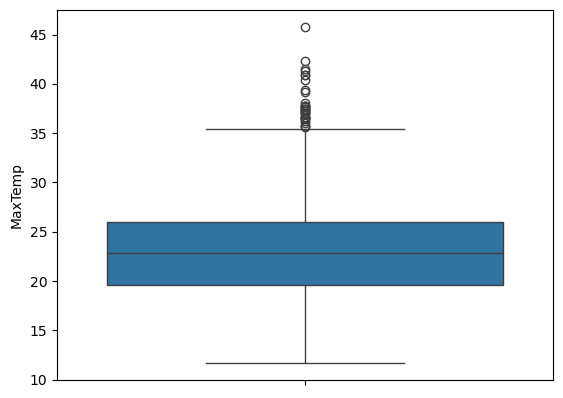

In [30]:
sns.boxplot(df['MaxTemp'])

<Axes: ylabel='Rainfall'>

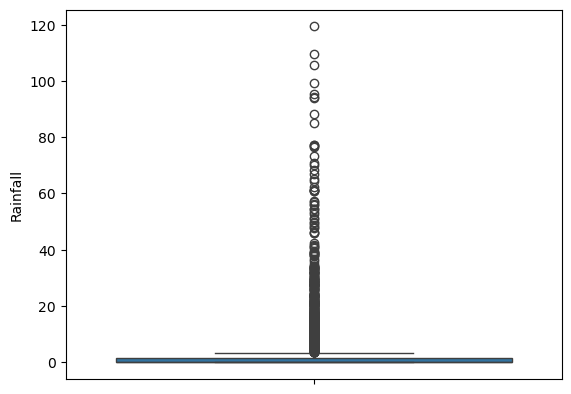

In [31]:
sns.boxplot(df['Rainfall'])

In [32]:
np.percentile(df.Rainfall, [99])[0]

52.29599999999982

In [33]:
uv=np.percentile(df.Rainfall, [99])[0]

In [34]:
df[(df.Rainfall > 2*uv)]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
1464,15.0,21.2,109.4,5.187432,2.3,96.0,71.0,1005.4,1005.9,4.181523,4.21866,15.6,20.1,1,1
2540,14.5,17.7,119.4,5.187432,0.0,87.0,96.0,1019.6,1016.8,8.000000,8.00000,14.9,14.6,1,1
2541,14.1,17.9,105.8,5.187432,0.6,98.0,94.0,1013.4,1010.5,8.000000,7.00000,16.1,17.2,1,1


##### Note: NO outlier treatment required as the outliers won't affect the result

### Preperation for creating Machine Learning Models

##### Importing Libraries

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

##### Defining Dependent and Independent Variable

In [40]:
X = df.loc[:, df.columns != 'RainTomorrow_Yes'] 
y = df['RainTomorrow_Yes']

In [41]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1


In [42]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow_Yes, dtype: int32

##### Preperation of Train-Test (80-20 Split)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Logistic Regression 

In [46]:
# Create a logistic Regression model
l_reg=LogisticRegression(solver='liblinear')

# Fit the model to the training data
l_reg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [47]:
# Make predictions on the test data
l_reg_pred=l_reg.predict(X_test)

# Create Confusion Matrix
l_reg_cm=confusion_matrix(y_test, l_reg_pred)

# Create And Print accuracy score,precision score,recall score,roc and confusion matrix
print('Accuracy Score: ',accuracy_score(y_test, l_reg_pred))
print('precision Score: ',precision_score(y_test, l_reg_pred))
print('recall Score: ',recall_score(y_test, l_reg_pred))
print('roc_auc_score: ',roc_auc_score(y_test, l_reg_pred))
print('confusion matrix:')
print(l_reg_cm)

Accuracy:  0.8323353293413174
precision_score:  0.7017543859649122
recall_score:  0.5063291139240507
roc_auc_score:  0.719831223628692
confusion matrix:
[[476  34]
 [ 78  80]]


## KNN 

In [49]:
# Create KNN classifier
knn_mod = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn_mod.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [50]:
# Make predictions on the test data
knn_mod_pred = knn_mod.predict(X_test)

# Create Confusion Matrix
knn_mod_cm=confusion_matrix(y_test, knn_mod_pred)

# Create And Print accuracy,precision score,recall score,roc and confusion matrix
print('Accuracy Score: ',accuracy_score(y_test, knn_mod_pred))
print('precision score: ',precision_score(y_test, knn_mod_pred))
print('recall score: ',recall_score(y_test, knn_mod_pred))
print('roc_auc_score: ',roc_auc_score(y_test, knn_mod_pred))
print('confusion matrix:')
print(knn_mod_cm)

Accuracy:  0.8248502994011976
precision score:  0.711340206185567
recall score:  0.43670886075949367
roc_auc_score:  0.69090344998759
confusion matrix:
[[482  28]
 [ 89  69]]


## KNN with GridSearchCV

In [52]:
# Define the hyperparameters and their possible values
n_params= {'n_neighbors':[2,3,4,5,6,7,8,9]}

# Create the GridSearchCV object
grid_search_knn = GridSearchCV(KNeighborsClassifier(), n_params, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search_knn.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [53]:
# Print the best hyperparameters
print("Best parameter: ", grid_search_knn.best_params_)

# Get the best estimator with the best hyperparameters
best_knn = grid_search_knn.best_estimator_

# Make prediction for test data
y_knn_pred = best_knn.predict(X_test)

# Create Confusion Matrix
knn_grid_cm=confusion_matrix(y_test, y_knn_pred)

# Create And Print accuracy,precision score,recall score,roc and confusion matrix
print('Accuracy Score: ',accuracy_score(y_test, y_knn_pred))
print('precision score: ',precision_score(y_test, y_knn_pred))
print('recall score: ',recall_score(y_test, y_knn_pred))
print('roc_auc_score: ',roc_auc_score(y_test, y_knn_pred))
print('confusion matrix:')
print(knn_grid_cm)

Best parameter:  {'n_neighbors': 9}
Accuracy:  0.8248502994011976
precision score:  0.6915887850467289
recall score:  0.46835443037974683
roc_auc_score:  0.7018242740134029
confusion matrix:
[[477  33]
 [ 84  74]]


## LDA

In [55]:
# Create LDA
clf_lda = LinearDiscriminantAnalysis()

# Fit the model to the training data
clf_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [56]:
# Make predictions on the test data
clf_lda_pred = clf_lda.predict(X_test)

# Create Confusion Matrix
lda_cm=confusion_matrix(y_test, clf_lda_pred)

# Create And Print accuracy,precision score,recall score,roc and confusion matrix
print('Accuracy Score: ',accuracy_score(y_test, clf_lda_pred))
print('precision score: ',precision_score(y_test, clf_lda_pred))
print('recall score: ',recall_score(y_test, clf_lda_pred))
print('roc_auc_score: ',roc_auc_score(y_test, clf_lda_pred))
print('confusion matrix:')
print(lda_cm)

Accuracy:  0.8368263473053892
precision score:  0.6870229007633588
recall score:  0.569620253164557
roc_auc_score:  0.7446140481509059
confusion matrix:
[[469  41]
 [ 68  90]]


### LDA with GridSearchCV

In [58]:
Define the hyperparameters and their possible values
param_grid={
    # solver
    'solver' : ['lsqr','eigen']
}

# Create LDA
clf_lda_grid = LinearDiscriminantAnalysis(shrinkage='auto')

# Create the GridSearchCV object
grid_search = GridSearchCV(clf_lda_grid,param_grid)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LinearDiscriminantAnalysis(shrinkage='auto'),
             param_grid={'solver': ['lsqr', 'eigen']})

In [59]:
# Print the best hyperparameters
print("Best parameter: ", grid_search.best_params_)

# Get the best estimator with the best hyperparameters
best_lda = grid_search.best_estimator_

# Make predictions Using best estimator  
lda_grid_pred = best_lda.predict(X_test)

# Create Confusion Matrix
lda_grid_cm=confusion_matrix(y_test, lda_grid_pred)

# Create And Print accuracy,precision score,recall score,roc and confusion matrix
print('Accuracy: ',accuracy_score(y_test, lda_grid_pred))
print('precision score: ',precision_score(y_test, lda_grid_pred))
print('recall score: ',recall_score(y_test, lda_grid_pred))
print('roc_auc_score: ',roc_auc_score(y_test, lda_grid_pred))
print('confusion matrix:')
print(lda_grid_cm)

Best parameter:  {'solver': 'lsqr'}
Accuracy:  0.8353293413173652
precision score:  0.6818181818181818
recall score:  0.569620253164557
roc_auc_score:  0.7436336559940431
confusion matrix:
[[468  42]
 [ 68  90]]


### Decision Tree Classification 

In [61]:
# Create Decision tree with max depth = 3
clf_d_tree = DecisionTreeClassifier(max_depth=3)

# Fit the model to the training data
clf_d_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [62]:
# Make predictions on the test data
clf_d_tree_pred = clf_d_tree.predict(X_test)

# Create Confusion Matrix
clf_d_tree_cm=confusion_matrix(y_test, clf_d_tree_pred)

# Create And Print accuracy,precision score,recall score,roc and confusion matrix
print('Accuracy Score: ',accuracy_score(y_test, clf_d_tree_pred))
print('precision score: ',precision_score(y_test, clf_d_tree_pred))
print('recall score: ',recall_score(y_test, clf_d_tree_pred))
print('roc_auc_score: ',roc_auc_score(y_test, clf_d_tree_pred))
print('confusion matrix:')
print(clf_d_tree_cm)

Accuracy:  0.811377245508982
precision score:  0.6159420289855072
recall score:  0.5379746835443038
roc_auc_score:  0.7170265574584264
confusion matrix:
[[457  53]
 [ 73  85]]


## Random Forest  

In [64]:
# Create a Random Forest Classifier
rf_tree = RandomForestClassifier(max_depth=3)

# Fit the model to the training data
rf_tree.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [65]:
# Make predictions on the test data
rf_tree_pred = rf_tree.predict(X_test)

# Create Confusion Matrix
rf_tree_cm=confusion_matrix(y_test, rf_tree_pred)

# Create And Print accuracy,precision score,recall score,roc and confusion matrix
print('Accuracy: ',accuracy_score(y_test, rf_tree_pred))
print('precision score: ',precision_score(y_test, rf_tree_pred))
print('recall score: ',recall_score(y_test, rf_tree_pred))
print('roc_auc_score: ',roc_auc_score(y_test, rf_tree_pred))
print('confusion matrix:')
print(rf_tree_cm)

Accuracy:  0.8383233532934131
precision score:  0.8205128205128205
recall score:  0.4050632911392405
roc_auc_score:  0.6888061553735417
confusion matrix:
[[496  14]
 [ 94  64]]


## Random Forest with GrisSearchCV

In [67]:
# Define the hyperparameters and their possible values
params = {
    # Number of trees
    'n_estimators': [50,150,200],
    # Maximum depth
    'max_depth': [4,5,6],
    # Minimum samples split in a node
    'min_samples_split': [3,5,10],
    # List minimum samples leaf for a node
    'min_samples_leaf':[1,2]
}

# Create a RandomForest Classifier
rf_gs = RandomForestClassifier(n_jobs=-1,random_state=0)


# Create the GridSearchCV object
grid_search_rf = GridSearchCV(rf_gs, params, cv=3,scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [50, 150, 200]},
             scoring='accuracy')

In [68]:
# Print the best hyperparameters
print("Best parameters: ", grid_search_rf.best_params_)

# Get the best estimator with the best hyperparameters
best_rf_gs = grid_search_rf.best_estimator_

# Make predictions using best estimator
best_rf_pred = best_rf_gs.predict(X_test)

# Create Confusion Matrix
best_rf_pred_cm=confusion_matrix(y_test, best_rf_pred)

# Create And Print accuracy,precision score,recall score,roc and confusion matrix
print('Accuracy: ',accuracy_score(y_test, best_rf_pred))
print('precision score: ',precision_score(y_test, best_rf_pred))
print('recall score: ',recall_score(y_test, best_rf_pred))
print('roc_auc_score: ',roc_auc_score(y_test, best_rf_pred))
print('confusion matrix:')
print(best_rf_pred_cm)

Best parameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
Accuracy:  0.8458083832335329
precision score:  0.8160919540229885
recall score:  0.44936708860759494
roc_auc_score:  0.7089972697939936
confusion matrix:
[[494  16]
 [ 87  71]]


## BAGGING

In [70]:
from sklearn.ensemble import BaggingClassifier

# Define the base Decision Tree model
base_tree = DecisionTreeClassifier(max_depth=4)

# Create a BaggingClassifier
clf_bagg = BaggingClassifier(estimator=base_tree)

# Define the hyperparameters and their possible values
params = {
    'n_estimators': [10, 50, 150]
}

# Create the GridSearchCV object
grid_search_bagg = GridSearchCV(clf_bagg, params, cv=3, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search_bagg.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4)),
             param_grid={'n_estimators': [10, 50, 150]}, scoring='accuracy')

In [71]:
# Print the best hyperparameters
print("Best parameter: ", grid_search_bagg.best_params_)

# Get the best estimator with the best hyperparameters
best_baggtree = grid_search_bagg.best_estimator_

# Make predictions Using best estimator  
bagg_pred = best_baggtree.predict(X_test)

# Create Confusion Matrix
bagg_pred_cm=confusion_matrix(y_test, bagg_pred)

# Create And Print accuracy,precision score,recall score,roc and confusion matrix
print('Accuracy: ',accuracy_score(y_test, bagg_pred))
print('precision score: ',precision_score(y_test, bagg_pred))
print('recall score: ',recall_score(y_test, bagg_pred))
print('roc_auc_score: ',roc_auc_score(y_test, bagg_pred))
print('confusion matrix:')
print(bagg_pred_cm)

Best parameter:  {'n_estimators': 150}
Accuracy:  0.8398203592814372
precision score:  0.7524752475247525
recall score:  0.4810126582278481
roc_auc_score:  0.7159965251923553
confusion matrix:
[[485  25]
 [ 82  76]]


In [72]:
# Create a Gradient Boosting Classifier
tree_gb = GradientBoostingClassifier()

 Define the hyperparameters and their possible values
param_grid_gb = {
    'n_estimators': [50,100,150],
    'max_depth': [3,5,7],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1,4]
}

# Create the GridSearchCV object
grid_search_gb = GridSearchCV(tree_gb, param_grid_gb, cv=3, scoring='accuracy',n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [73]:
# Print the best hyperparameters
print("Best parameter: ", grid_search_gb.best_params_)

# Get the best estimator with the best hyperparameters
best_gb = grid_search_gb.best_estimator_

# Make predictions Using best estimator  
gb_pred = best_gb.predict(X_test)

# Create Confusion Matrix
gb_pred_cm=confusion_matrix(y_test, gb_pred)

# Create And Print accuracy,precision score,recall score,roc and confusion matrix
print('Accuracy: ',accuracy_score(y_test, gb_pred))
print('precision score: ',precision_score(y_test, gb_pred))
print('recall score: ',recall_score(y_test, gb_pred))
print('roc_auc_score: ',roc_auc_score(y_test, gb_pred))
print('confusion matrix:')
print(gb_pred_cm)

Best parameter:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
Accuracy:  0.8383233532934131
precision score:  0.75
recall score:  0.47468354430379744
roc_auc_score:  0.71283196823033
confusion matrix:
[[485  25]
 [ 83  75]]


## ADA Boost

In [75]:
# Create a base classifier
base_tree = DecisionTreeClassifier(max_depth=3)

# Create an AdaBoost Classifier
ada_classifier = AdaBoostClassifier(base_tree)

# Define the hyperparameters and their possible values
param_grid_ada = {
    'n_estimators': [50,100,200],
    'learning_rate': [0.1, 0.2],
}

# Create the GridSearchCV object
grid_search_ada = GridSearchCV(ada_classifier, param_grid_ada, cv=3, scoring='accuracy',n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search_ada.fit(X_train, y_train)

C:\Users\kuber\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [76]:
# Print the best hyperparameters
print("Best parameter: ", grid_search_ada.best_params_)

# Get the best estimator with the best hyperparameters
best_ada = grid_search_ada.best_estimator_

# Make predictions Using best estimator  
ada_pred = best_ada.predict(X_test)

# Create Confusion Matrix
ad_pred_cm=confusion_matrix(y_test, ada_pred)

# Create And Print accuracy,precision score,recall score,roc and confusion matrix
print('Accuracy: ',accuracy_score(y_test, ada_pred))
print('precision score: ',precision_score(y_test, ada_pred))
print('recall score: ',recall_score(y_test, ada_pred))
print('roc_auc_score: ',roc_auc_score(y_test, ada_pred))
print('confusion matrix:')
print(ad_pred_cm)

Best parameter:  {'learning_rate': 0.1, 'n_estimators': 50}
Accuracy:  0.8353293413173652
precision score:  0.7448979591836735
recall score:  0.4620253164556962
roc_auc_score:  0.7065028543062795
confusion matrix:
[[485  25]
 [ 85  73]]


## XG Boost  

In [78]:
# Create an XGBoost Classifier
xgb_classifier = XGBClassifier()

# Define the hyperparameters and their possible values
param_xgb = {
    'n_estimators': [50,100,150],
    'learning_rate': [0.1, 0.2],
    'max_depth': [4, 5, 6],
    'min_child_weight': [2, 3, 4, 5]
}

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(xgb_classifier, param_xgb, cv=3, scoring='accuracy',n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [4, 5, 6],
                         'min_child_weight': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [79]:
# Print the best hyperparameters
print("Best parameter: ", grid_search_xgb.best_params_)

# Get the best estimator with the best hyperparameters
best_xgb = grid_search_xgb.best_estimator_

# Make predictions Using best estimator  
xgb_pred = best_xgb.predict(X_test)

# Create Confusion Matrix
xgb_pred_cm=confusion_matrix(y_test, xgb_pred)

# Create And Print accuracy,precision score,recall score,roc and confusion matrix
print('Accuracy: ',accuracy_score(y_test, xgb_pred))
print('precision score: ',precision_score(y_test, xgb_pred))
print('recall score: ',recall_score(y_test, xgb_pred))
print('roc_auc_score: ',roc_auc_score(y_test, xgb_pred))
print('confusion matrix:')
print(xgb_pred_cm)

Best parameter:  {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 50}
Accuracy:  0.8398203592814372
precision score:  0.7475728155339806
recall score:  0.4873417721518987
roc_auc_score:  0.7181806899975179
confusion matrix:
[[484  26]
 [ 81  77]]


# Conclusion

**Accuracy Score:**
 After evaluation,on the basis of accuracy the Random Forest Classifier with the hyperparameters {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50} is the best performer with highest accuracy i,e. 0.84580838323.

**Precision Score:**
 After evaluation,on the basis of precision the Random Forest Classifier with the parameters {'max_depth': 3} is the best performer with highest accuracy i,e.0.8441558441558441

## To further improve the performance of selected model, I can take several steps:
- **Increase the Number of Estimators:**
increasing the estimaters can helps us improve the performance for various models
    
- **Tune Hyperparameters:**
Defining more parameters and refining all possibilites can help us to find best combinations of parameters to further enhance the accuracy for the models
  
- **Feature Scaling:**
Applying Scaling preprocessing can give us excelent results.

- **Using Necessary features:**
discarding the features that are not impacting the desired result much can be a beneficial.